In [1]:
import sys
print(sys.version)

3.10.17 (main, Apr  8 2025, 12:10:59) [Clang 15.0.0 (clang-1500.1.0.2.5)]


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import numpy as np
import pandas as pd

import glob

In [3]:
from fantasy_agn.tools import read_sdss, read_text, read_gama_fits

# Below command import the necessary commands, which will be described later
from fantasy_agn.models import create_input_folder

from fantasy_agn.models import create_feii_model, create_model, create_tied_model, continuum, create_line, create_fixed_model

In [5]:
s=read_text('z05.txt')

In [6]:
s

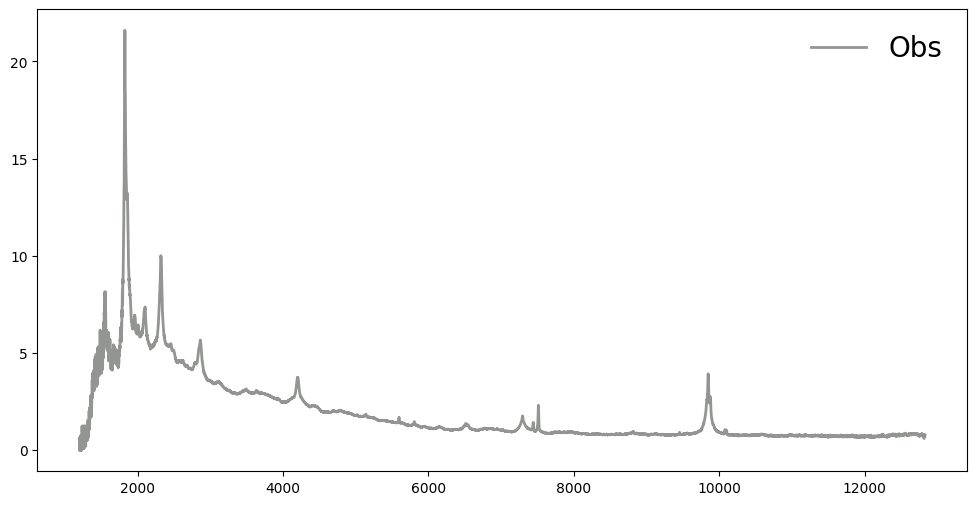

In [7]:
#Let's plot the spectrum for visual inspection.

plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(12,6))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.legend(loc='upper right',  prop={'size': 20}, frameon=False, ncol=2)

# It is obvious, e.g. based on the strong blue continuum and absence of absorption line, that the stellar contribution
# from the host galaxy can be negligible.

In [8]:
s.ra=29.519807539582 #example input of arbitrary rightascension
s.dec=-0.872742349310271 #example input of arbitrary declination
s.DeRedden()

In [9]:
s.z=0.5 #example input of arbitrary redshift
s.CorRed()

In [10]:
s.flux=s.flux*10

In [11]:
create_input_folder(xmin=4000,xmax=8000, path_to_folder='liness/')

Directory  liness/  already exists


In [12]:
cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br' )
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=5000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr', fwhm=1000,min_offset=0, max_offset=300, min_fwhm=900, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
#fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)
#fe.amp_b4p.min=10 #An example how to force the amplitude of a selected FeII multiplet.

In [13]:
s.crop(3200, 7700)
print(s.wave) # simple examine of the wavelength range

[3200.5 3201.5 3202.5 ... 7697.5 7698.5 7699.5]


In [14]:
model = cont+broad+narrow+he

In [15]:
s.fit(model, ntrial=2)

iteration:  1
iteration:  2


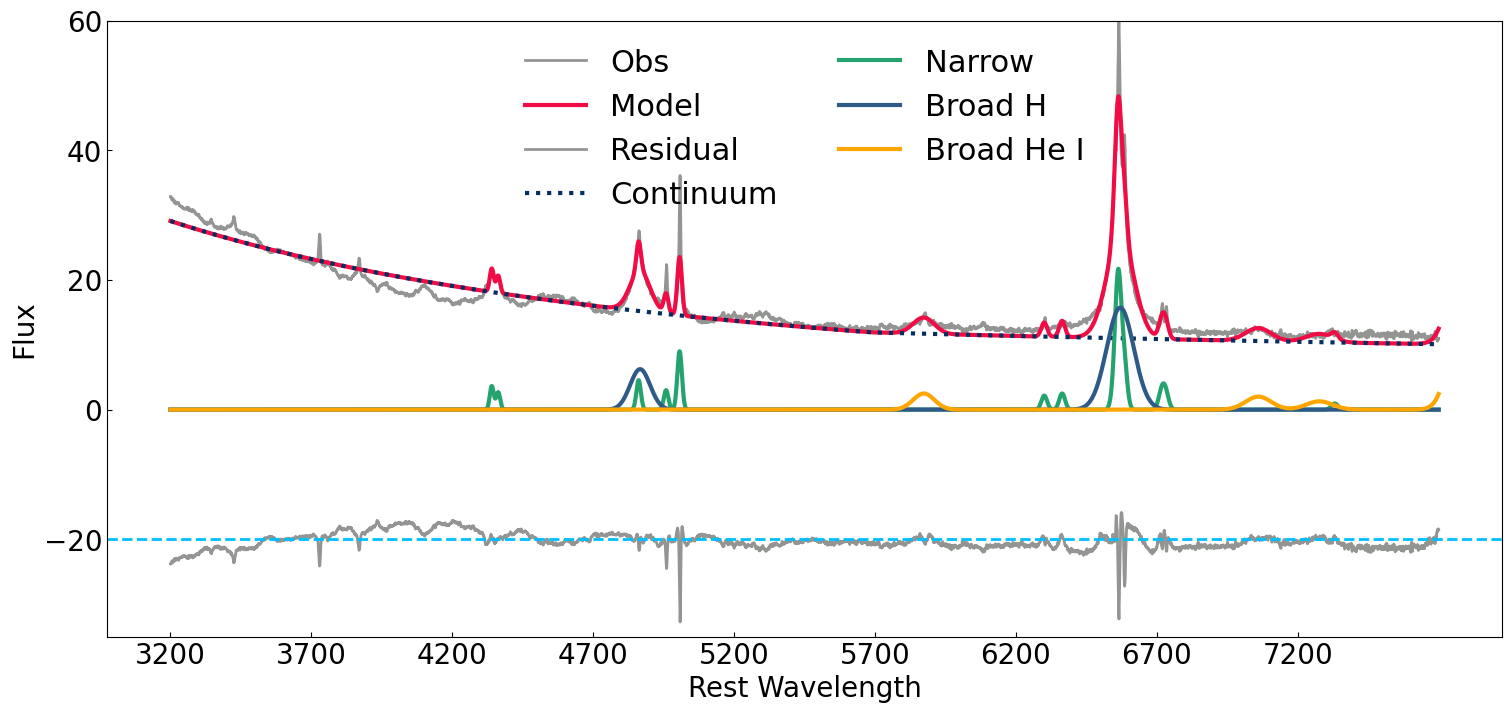

In [16]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
plt.plot(s.wave, model(s.wave)-s.flux-20, '-',color="#929591", label='Residual', lw=2)
plt.axhline(y=-20, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),':',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
#plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)

plt.xlabel('Rest Wavelength',fontsize=20)
plt.ylabel('Flux',fontsize=20)
#plt.xlim(3200, 7700)
plt.ylim(-35,60)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(3200, 7700, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

#plt.savefig('fantasy_fit.pdf')

In [17]:
# Integrate total broad model,
flux_broad=np.sum(broad(s.wave))
print("Broad emission line total flux=",flux_broad)

# Mask the wavelength range of interess (e.g. Ha line) and integrate broad component.
x=s.wave
mask_ha=(x>6300)&(x<6700)
Ha_broad=np.sum(broad(s.wave)[mask_ha])
print("Ha_broad=",Ha_broad)

Broad emission line total flux= 2443.1085440290753
Ha_broad= 1881.9705566372681


# z = 1.0:

In [18]:
s=read_text('z10.txt')
s.ra=29.519807539582 #example input of arbitrary rightascension
s.dec=-0.872742349310271 #example input of arbitrary declination
s.DeRedden()
s.z=1 #example input of arbitrary redshift
s.CorRed()
s.flux=s.flux*10
cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br' )
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=5000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr', fwhm=1000,min_offset=0, max_offset=300, min_fwhm=900, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
#fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)
#fe.amp_b4p.min=10 #An example how to force the amplitude of a selected FeII multiplet.
s.crop(3200, 7700)
model = cont+broad+narrow+he
s.fit(model, ntrial=2)

iteration:  1
iteration:  2


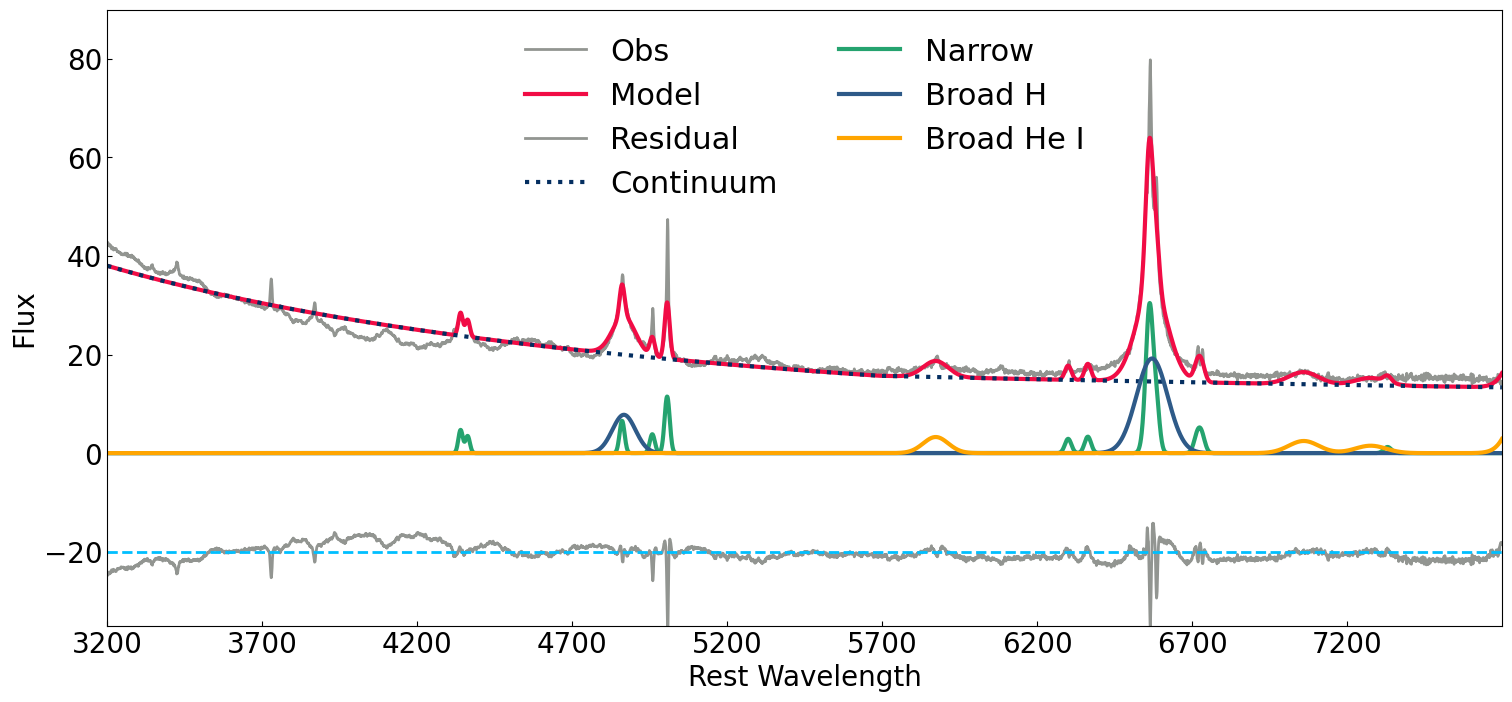

In [19]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
plt.plot(s.wave, model(s.wave)-s.flux-20, '-',color="#929591", label='Residual', lw=2)
plt.axhline(y=-20, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),':',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
#plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)

plt.xlabel('Rest Wavelength',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.xlim(3200, 7700)
plt.ylim(-35,90)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(3200, 7700, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

plt.savefig('fantasy_fitz10.png', bbox_inches='tight', pad_inches=0.1, transparent=True)

In [20]:
# Integrate total broad model,
flux_broad=np.sum(broad(s.wave))
print("Broad emission line total flux=",flux_broad)

# Mask the wavelength range of interess (e.g. Ha line) and integrate broad component.
x=s.wave
mask_ha=(x>6300)&(x<6700)
Ha_broad=np.sum(broad(s.wave)[mask_ha])
print("Ha_broad=",Ha_broad)

Broad emission line total flux= 3146.1292294858263
Ha_broad= 2407.708709411218


# z = 1.5:

In [21]:
s=read_text('z15.txt')
s.ra=29.519807539582 #example input of arbitrary rightascension
s.dec=-0.872742349310271 #example input of arbitrary declination
s.DeRedden()
s.z=1.5 #example input of arbitrary redshift
s.CorRed()
s.flux=s.flux*10
cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br' )
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=5000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr', fwhm=1000,min_offset=0, max_offset=300, min_fwhm=900, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
#fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)
#fe.amp_b4p.min=10 #An example how to force the amplitude of a selected FeII multiplet.
s.crop(3200, 7700)
model = cont+broad+narrow+he
s.fit(model, ntrial=2)

iteration:  1
iteration:  2


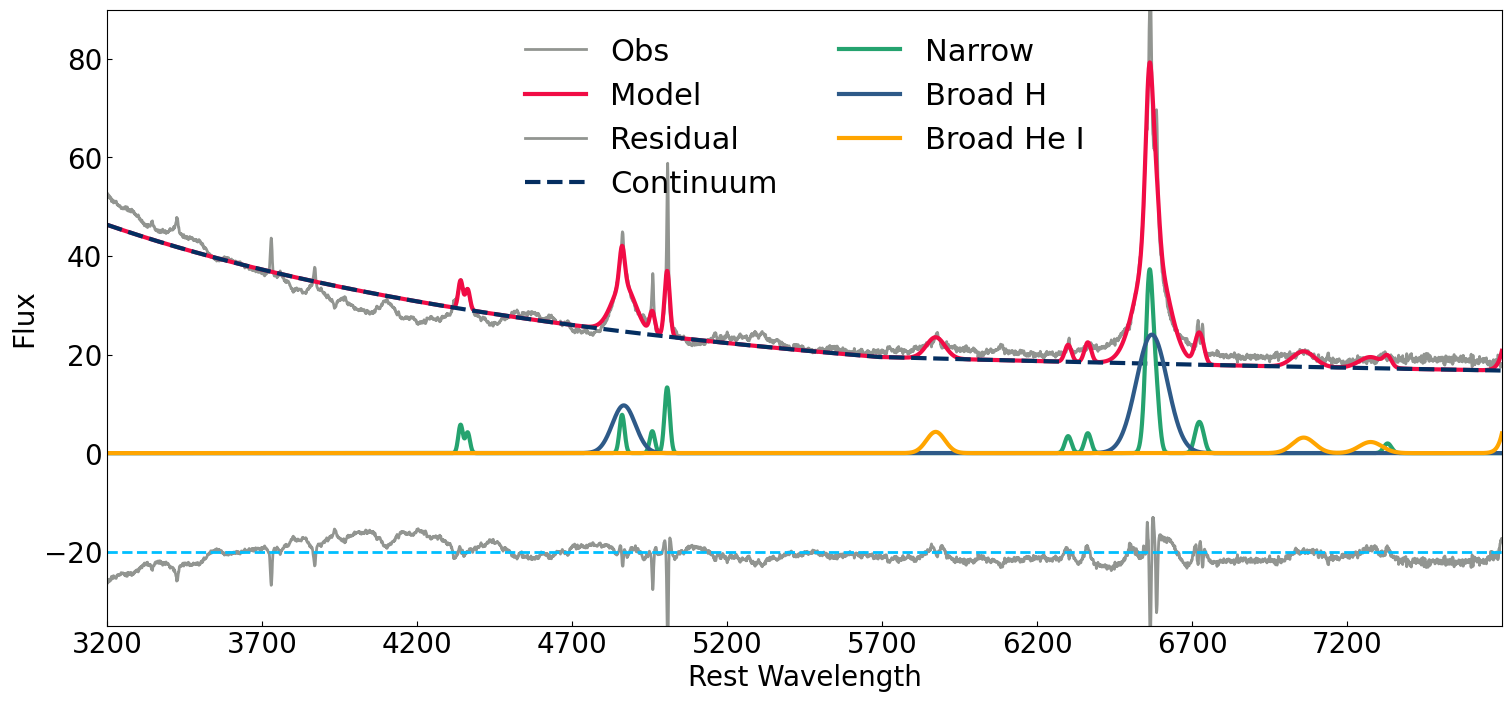

In [22]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
plt.plot(s.wave, model(s.wave)-s.flux-20, '-',color="#929591", label='Residual', lw=2)
plt.axhline(y=-20, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),'--',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
#plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)

plt.xlabel('Rest Wavelength',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.xlim(3200, 7700)
plt.ylim(-35,90)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(3200, 7700, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

#plt.savefig('fantasy_fit.pdf')

In [23]:
# Integrate total broad model,
flux_broad=np.sum(broad(s.wave))
print("Broad emission line total flux=",flux_broad)

# Mask the wavelength range of interess (e.g. Ha line) and integrate broad component.
x=s.wave
mask_ha=(x>6300)&(x<6700)
Ha_broad=np.sum(broad(s.wave)[mask_ha])
print("Ha_broad=",Ha_broad)

Broad emission line total flux= 3913.963558315686
Ha_broad= 2999.9848963854506


In [24]:
# z = 2.0 

In [25]:
s=read_text('z20.txt')
s.ra=29.519807539582 #example input of arbitrary rightascension
s.dec=-0.872742349310271 #example input of arbitrary declination
s.DeRedden()
s.z=2 #example input of arbitrary redshift
s.CorRed()
s.flux=s.flux*10
cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br' )
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=5000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr', fwhm=1000,min_offset=0, max_offset=300, min_fwhm=900, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
#fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)
#fe.amp_b4p.min=10 #An example how to force the amplitude of a selected FeII multiplet.
s.crop(3200, 7700)
model = cont+broad+narrow+he
s.fit(model, ntrial=2)

iteration:  1
iteration:  2


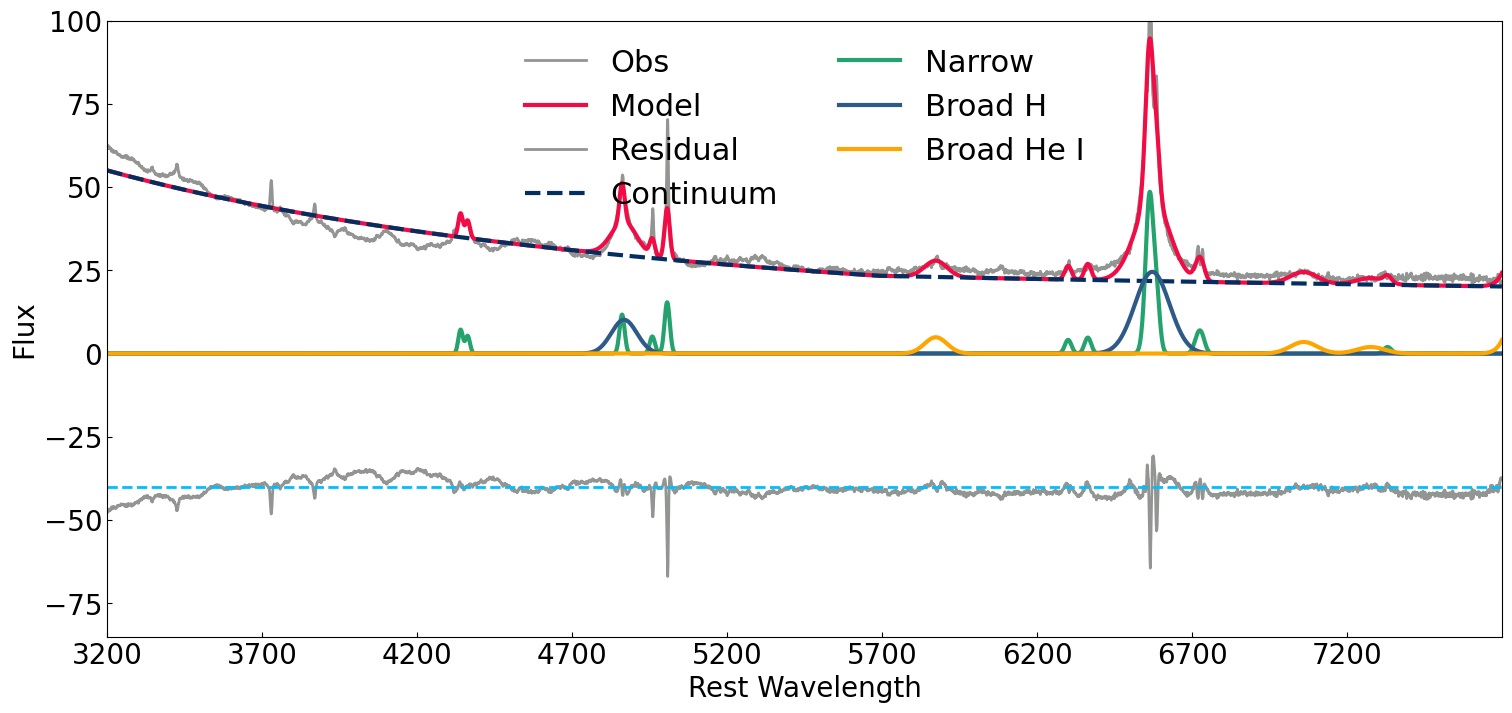

In [26]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
plt.plot(s.wave, model(s.wave)-s.flux-40, '-',color="#929591", label='Residual', lw=2)
plt.axhline(y=-40, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),'--',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
#plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)

plt.xlabel('Rest Wavelength',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.xlim(3200, 7700)
plt.ylim(-85,100)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(3200, 7700, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

#plt.savefig('fantasy_fit.pdf')

In [27]:
# Integrate total broad model,
flux_broad=np.sum(broad(s.wave))
print("Broad emission line total flux=",flux_broad)

# Mask the wavelength range of interess (e.g. Ha line) and integrate broad component.
x=s.wave
mask_ha=(x>6300)&(x<6700)
Ha_broad=np.sum(broad(s.wave)[mask_ha])
print("Ha_broad=",Ha_broad)

Broad emission line total flux= 4472.638899694035
Ha_broad= 3387.809132974786


In [28]:
# z = 2.5 

In [29]:
s=read_text('z25.txt')
s.ra=29.519807539582 #example input of arbitrary rightascension
s.dec=-0.872742349310271 #example input of arbitrary declination
s.DeRedden()
s.z=2.5 #example input of arbitrary redshift
s.CorRed()
s.flux=s.flux*10
cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br' )
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=5000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr', fwhm=1000,min_offset=0, max_offset=300, min_fwhm=900, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
#fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)
#fe.amp_b4p.min=10 #An example how to force the amplitude of a selected FeII multiplet.
s.crop(3200, 7700)
model = cont+broad+narrow+he
s.fit(model, ntrial=2)

iteration:  1
iteration:  2


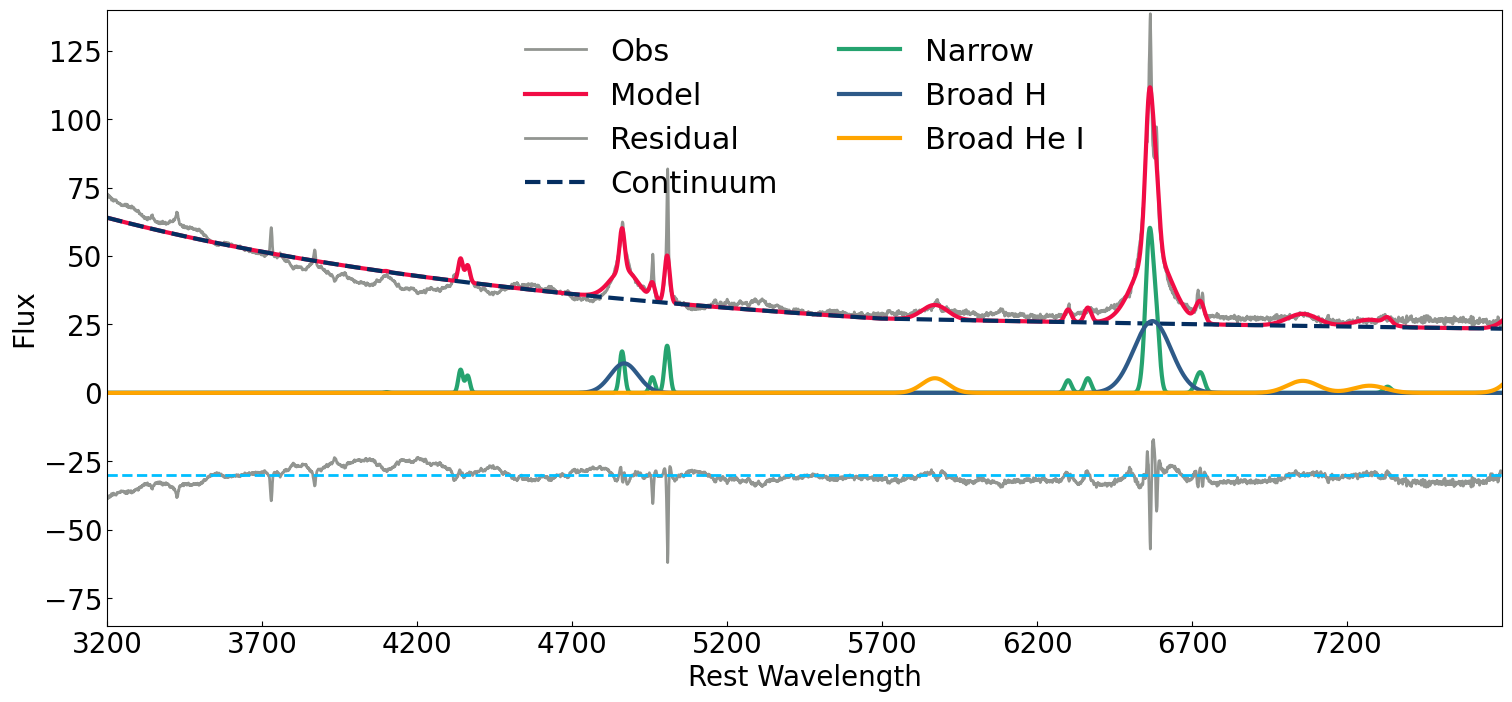

In [30]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
plt.plot(s.wave, model(s.wave)-s.flux-30, '-',color="#929591", label='Residual', lw=2)
plt.axhline(y=-30, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),'--',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
#plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)

plt.xlabel('Rest Wavelength',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.xlim(3200, 7700)
plt.ylim(-85,140)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(3200, 7700, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

#plt.savefig('fantasy_fit.pdf')

In [31]:
# Integrate total broad model,
flux_broad=np.sum(broad(s.wave))
print("Broad emission line total flux=",flux_broad)

# Mask the wavelength range of interess (e.g. Ha line) and integrate broad component.
x=s.wave
mask_ha=(x>6300)&(x<6700)
Ha_broad=np.sum(broad(s.wave)[mask_ha])
print("Ha_broad=",Ha_broad)

Broad emission line total flux= 5159.268387197375
Ha_broad= 3887.8671391810303


In [32]:
# z = 3.0 

In [33]:
s=read_text('z25.txt')
s.ra=29.519807539582 #example input of arbitrary rightascension
s.dec=-0.872742349310271 #example input of arbitrary declination
s.DeRedden()
s.z=2.5 #example input of arbitrary redshift
s.CorRed()
s.flux=s.flux*10
cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br' )
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=5000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr', fwhm=1000,min_offset=0, max_offset=300, min_fwhm=900, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
#fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)
#fe.amp_b4p.min=10 #An example how to force the amplitude of a selected FeII multiplet.
s.crop(3200, 7700)
model = cont+broad+narrow+he
s.fit(model, ntrial=2)

iteration:  1
iteration:  2


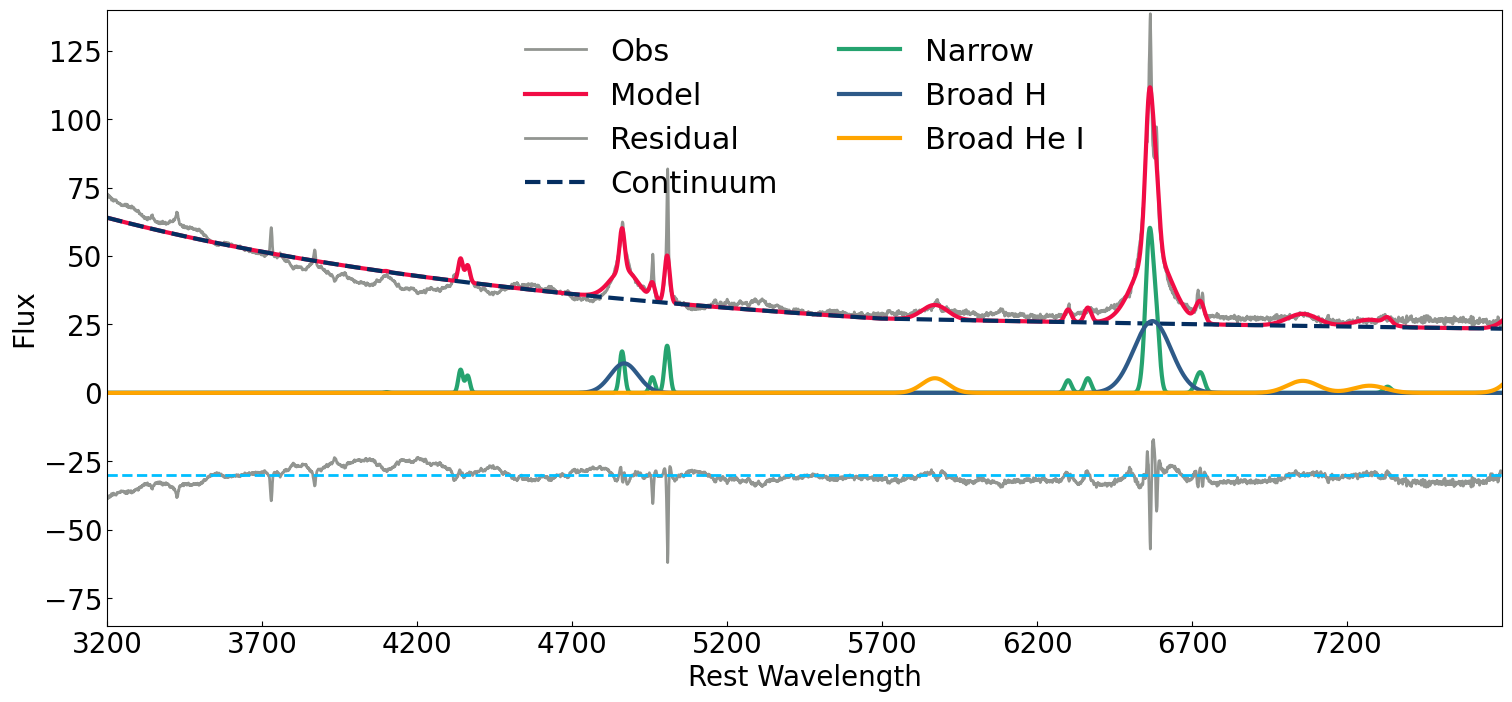

In [34]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
plt.plot(s.wave, model(s.wave)-s.flux-30, '-',color="#929591", label='Residual', lw=2)
plt.axhline(y=-30, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),'--',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
#plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)

plt.xlabel('Rest Wavelength',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.xlim(3200, 7700)
plt.ylim(-85,140)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(3200, 7700, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

#plt.savefig('fantasy_fit.pdf')

In [35]:
# Integrate total broad model,
flux_broad=np.sum(broad(s.wave))
print("Broad emission line total flux=",flux_broad)

# Mask the wavelength range of interess (e.g. Ha line) and integrate broad component.
x=s.wave
mask_ha=(x>6300)&(x<6700)
Ha_broad=np.sum(broad(s.wave)[mask_ha])
print("Ha_broad=",Ha_broad)

Broad emission line total flux= 5159.268387197375
Ha_broad= 3887.8671391810303


In [36]:
5159/2443

2.1117478510028653